<a href="https://colab.research.google.com/github/jesuselizondo/Inteligencia-Artificial-y-Redes-Neuronales/blob/main/Actividad_6_Aprendizaje_supervisado%2C_%C3%A1rbol_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTAR LIBRERIAS**

In [ ]:
# Zaira Villalobos García 2132006
# Nestor Alejandro Jimenez Barragan 2132189
# Emiliano Javier Elizondo Castillo 2058628
# Jesús Adrian Saucedo Elizondo 2062669
# Carlos Emilio Marrero Herrera 1928023
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
!pip install ucimlrepo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


**CARGAR DATOS**

In [ ]:
# Carga el dataset (ID 17 = Breast Cancer Wisconsin Diagnostic)
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Datos en pandas
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


**PREPROCESAMIENTO**

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**SELECCION Y ENTRENAMIENTO DEL MODELO**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train_data, train_labels)

DecisionTreeClassifier()

**PRUEBA DEL MODELO**

In [ ]:
# Exactitud del modelo en el entrenamiento.
train_accuracy = clf.score(train_data, train_labels)
print(train_accuracy)

1.0


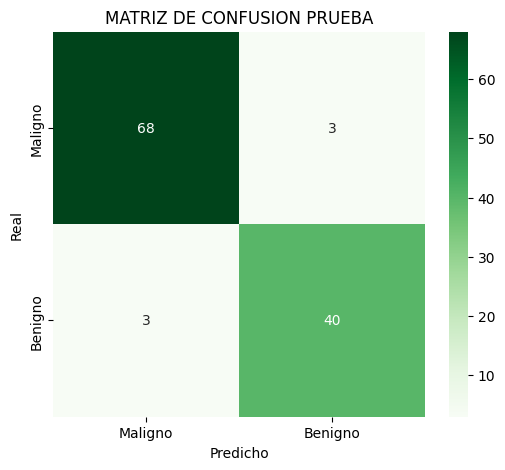

In [ ]:

y_pred = clf.predict(test_data)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(test_labels, y_pred)

# Mostrar la matriz de confusión de resultados de la prueba
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("MATRIZ DE CONFUSION PRUEBA")
plt.show()

In [ ]:
accuracy = accuracy_score(test_labels, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(test_labels, y_pred))

Precisión del modelo: 0.9474

Reporte de clasificación:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



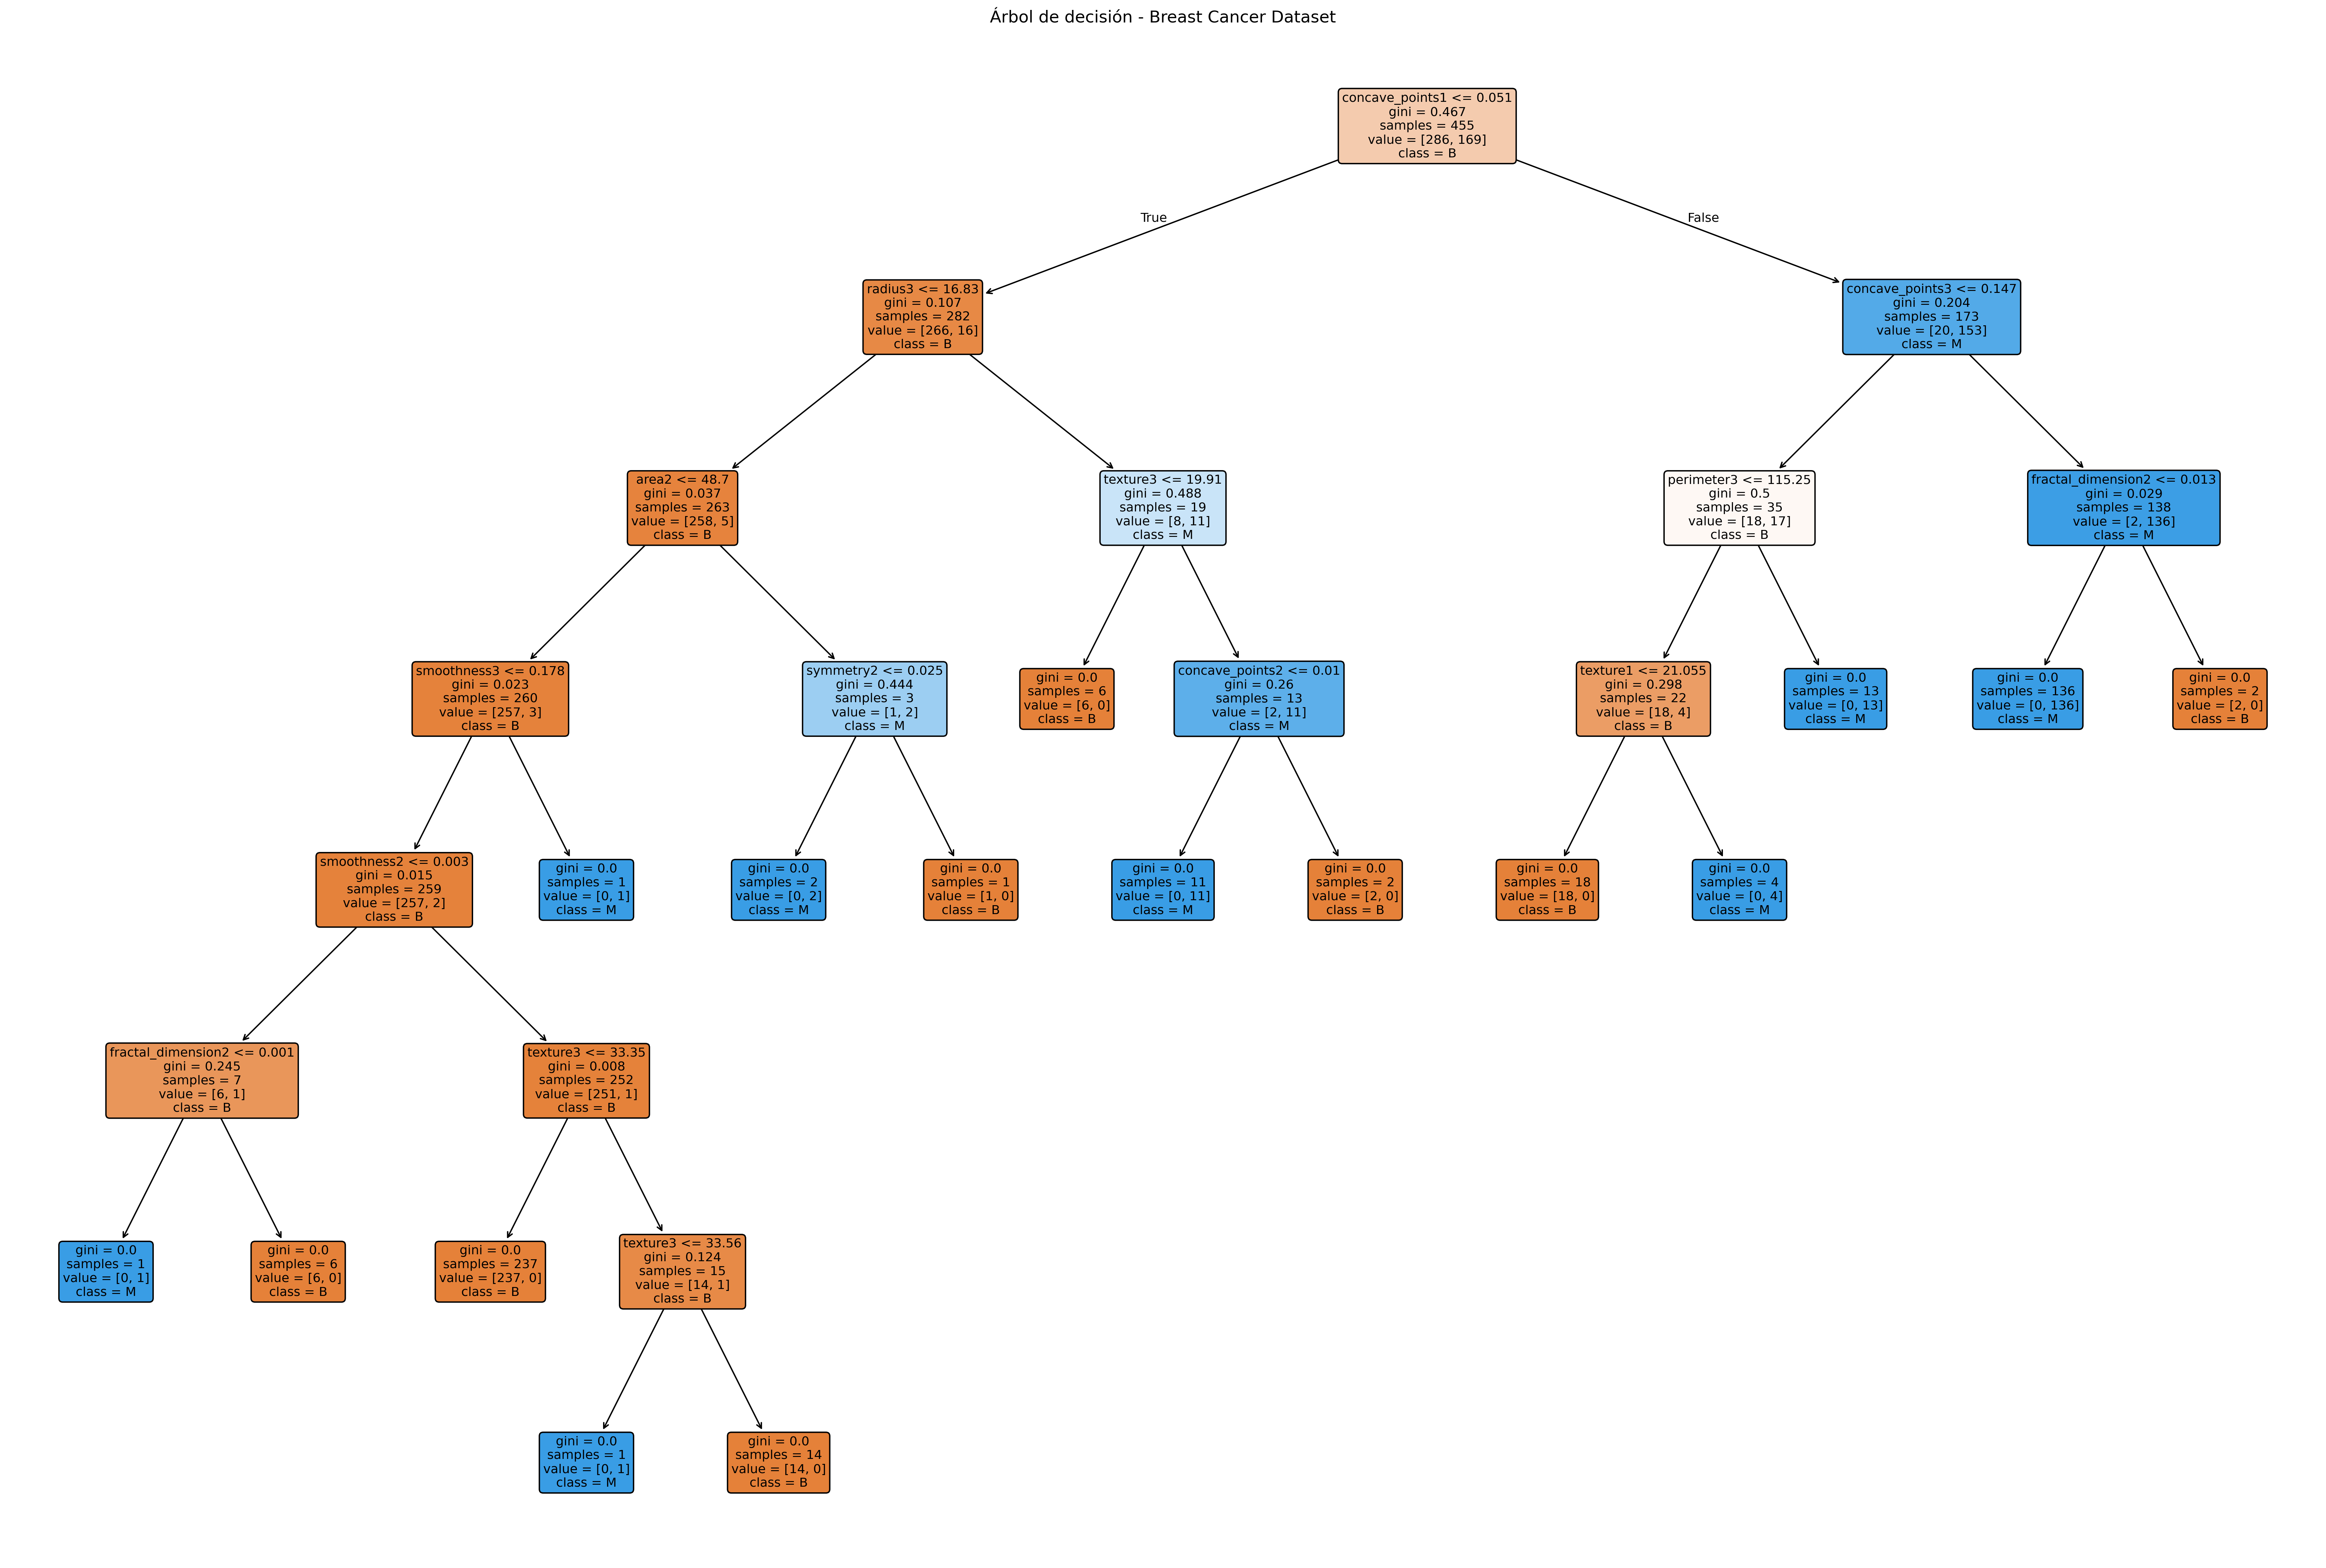

In [ ]:
# Visualizar el árbol de decisión con alta resolución
plt.figure(figsize=(30, 20), dpi=300)
plot_tree(clf,
          filled=True,
          feature_names=train_data.columns,
          class_names=[str(c) for c in clf.classes_],
          rounded=True)
plt.title("Árbol de decisión - Breast Cancer Dataset")
plt.show()